In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library('tidyverse')
quiet_library("hise")
quiet_library('ArchR')
quiet_library('data.table')
quiet_library('parallel')
quiet_library('arrow')
quiet_library('dplyr')
library(BSgenome.Hsapiens.UCSC.hg38)

options(future.globals.maxSize = 1000 * 1024^5)

addArchRGenome("hg38")
addArchRThreads(threads = 10)
pathToMacs2<-'/opt/conda/bin/macs3'


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
projHeme1 <- loadArchRProject(path = 'PenSen_ATAC/')


Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [3]:
meta_data<-read.csv('meta_data_GEO.csv')

In [4]:
meta_data<-meta_data %>%
  mutate(Age_Group = case_when(
    str_starts(subject_id.ch1, "BR") ~ "Older",
    TRUE ~ "Children"
  ))

In [5]:
df_meta<-meta_data[c('combined_sample_id','Age_Group')]
colnames(df_meta)[1]<-'Sample'

In [6]:
df<-left_join(as.data.frame(projHeme1@cellColData),df_meta)
projHeme1@cellColData$Age_Group<-df$Age_Group

Joining with `by = join_by(Sample)`


In [7]:
df_meta<-meta_data[c('combined_sample_id','subject_id.ch1')]
colnames(df_meta)[1]<-'Sample'

In [8]:
df<-left_join(as.data.frame(projHeme1@cellColData),df_meta)
projHeme1@cellColData$subject_id.ch1<-df$subject_id.ch1

Joining with `by = join_by(Sample)`


In [10]:
idxSample <- BiocGenerics::which(projHeme1$AIFI_L3 %in% "CM CD4 T cell")
cellsSample <- projHeme1$cellNames[idxSample]
projHeme1_subset<-projHeme1[cellsSample, ]


Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [11]:
head(cellsSample)

[1] "GSM6611363_B065-P1_PB00593-04#ca21f926e40911eb891842010a19c839"
[2] "GSM6611363_B065-P1_PB00593-04#86cbd2f0e40911ebba0842010a19c839"
[3] "GSM6611363_B065-P1_PB00593-04#f8fbb8d2e40811eb911442010a19c839"
[4] "GSM6611363_B065-P1_PB00593-04#10c358bce40911eb942b42010a19c839"
[5] "GSM6611363_B065-P1_PB00593-04#6609c810e40911ebbcff42010a19c839"
[6] "GSM6611363_B065-P1_PB00593-04#81dbe74ee40911ebba0842010a19c839"

In [12]:
df_subset<-df %>% filter(AIFI_L3=="CM CD4 T cell")

In [13]:
set.seed(42)
df_subset<-df_subset %>% group_by(Sample) %>% sample_n(717)

In [14]:

cellsSample <- paste0(df_subset$Sample,'#',df_subset$barcodes)
projHeme1_subset<-projHeme1[cellsSample, ]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



In [15]:
p <- plotBrowserTrack(
    ArchRProj = projHeme1_subset, 
    groupBy = "Age_Group", maxCells = 32216,
    geneSymbol = c('IL4','IL13','IL5','RAD50')
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-8e861b313e4-Date-2024-08-12_Time-03-26-03.862942.log
If there is an issue, please report to github with logFile!

2024-08-12 03:26:04.046393 : Validating Region, 0.003 mins elapsed.



GRanges object with 4 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr5 132673986-132682676      + |        3565         IL4
  [2]     chr5 132656263-132661110      + |        3596        IL13
  [3]     chr5 132541444-132556838      - |        3567         IL5
  [4]     chr5 132556019-132646344      + |       10111       RAD50
  -------
  seqinfo: 24 sequences from hg38 genome


2024-08-12 03:26:04.171178 : Adding Bulk Tracks (1 of 4), 0.005 mins elapsed.

2024-08-12 03:26:35.152321 : Adding Feature Tracks (1 of 4), 0.522 mins elapsed.

2024-08-12 03:26:35.267129 : Adding Gene Tracks (1 of 4), 0.523 mins elapsed.

2024-08-12 03:26:35.865813 : Plotting, 0.533 mins elapsed.

2024-08-12 03:26:38.030466 : Adding Bulk Tracks (2 of 4), 0.569 mins elapsed.

2024-08-12 03:26:41.843735 : Adding Feature Tracks (2 of 4), 0.633 mins elapsed.

2024-08-12 03:26:41.91206 : Adding Gene Tracks (2 of 4), 0.634 mins elapsed.

2024-08-12 03:26:42.195737 : Plotting, 0.639 mins elapsed.

2024-08-12 03:26:42.823041 : Adding Bulk Tracks (3 of 4), 0.649 mins elapsed.

2024-08-12 03:26:44.909539 : Adding Feature Tracks (3 of 4), 0.684 mins elapsed.

2024-08-12 03:26:44.980352 : Adding Gene Tracks (3 of 4), 0.685 mins elapsed.

2024-08-12 03:26:45.288804 : Plotting, 0.69 mins elapsed.

2024-08-12 03:26:45.965473 : Adding Bulk Tracks (4 of 4), 0.702 mins elapsed.

2024-08-12 03:26:50.122

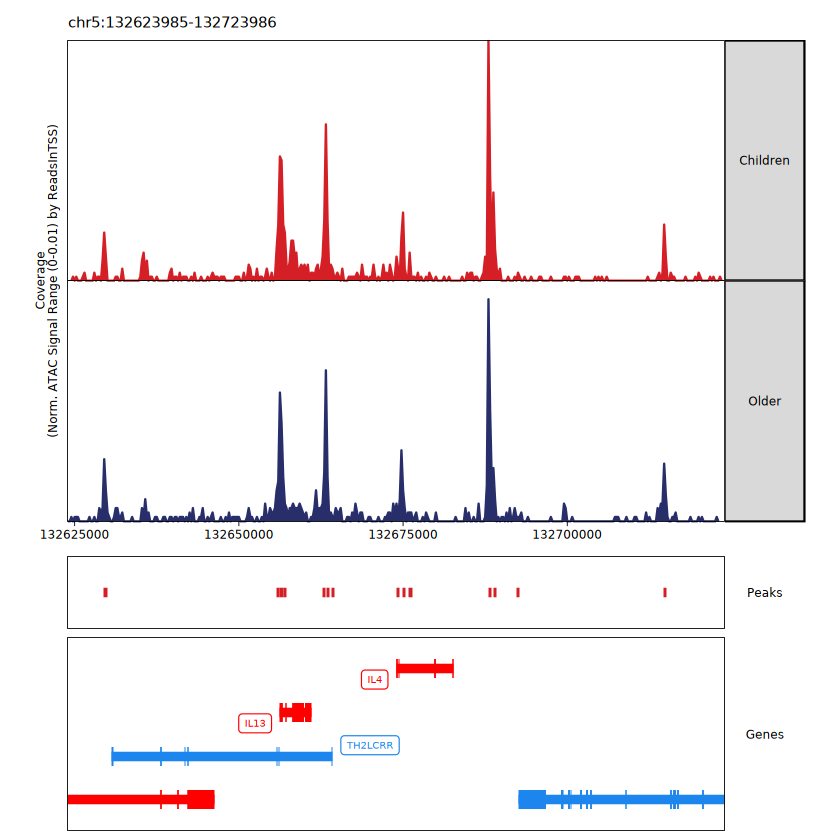

In [16]:
grid::grid.newpage()
grid::grid.draw(p$IL4)


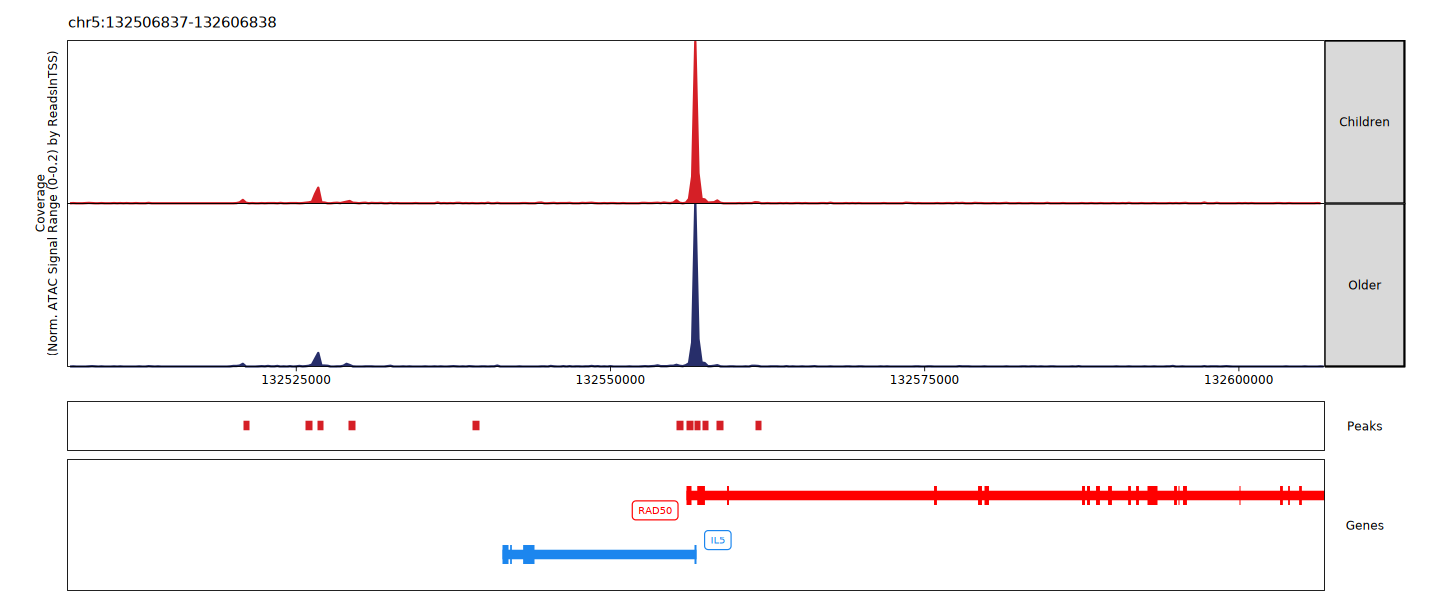

In [17]:
options(repr.plot.width = 12, repr.plot.height = 5)
grid::grid.newpage()
grid::grid.draw(p$IL5)